In [5]:
import pandas as pd

data_path = r'TRAFFIC PREDICTION\traffic.csv'
df = pd.read_csv(data_path)

print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  48120 non-null  object
 1   Junction  48120 non-null  int64 
 2   Vehicles  48120 non-null  int64 
 3   ID        48120 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB
None
              DateTime  Junction  Vehicles           ID
0  2015-11-01 00:00:00         1        15  20151101001
1  2015-11-01 01:00:00         1        13  20151101011
2  2015-11-01 02:00:00         1        10  20151101021
3  2015-11-01 03:00:00         1         7  20151101031
4  2015-11-01 04:00:00         1         9  20151101041


Number of unique junctions: 4
Overall time range: 2015-11-01 00:00:00 to 2017-06-30 23:00:00
Time range per junction:
                 min                 max
Junction                               
1        2015-11-01 2017-06-30 23:00:00
2        2015-11-01 2017-06-30 23:00:00
3        2015-11-01 2017-06-30 23:00:00
4        2017-01-01 2017-06-30 23:00:00


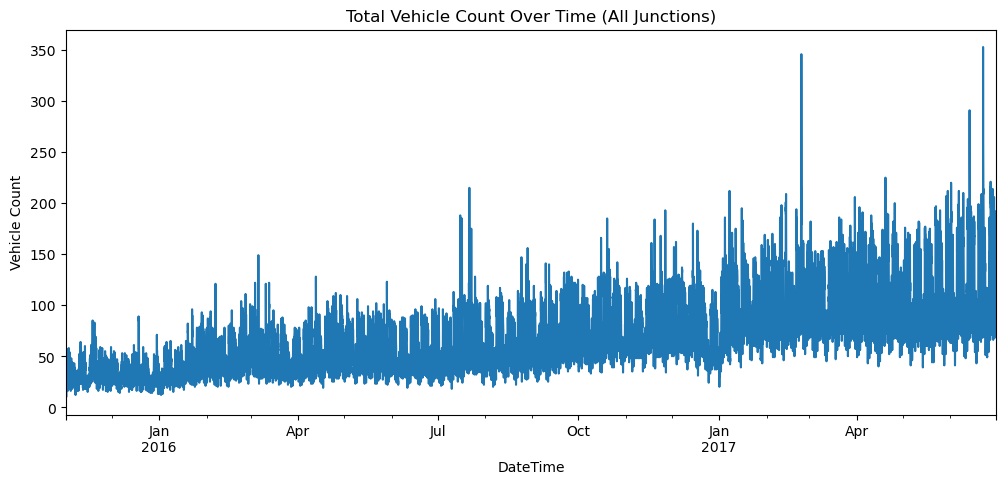

In [6]:
df['DateTime'] = pd.to_datetime(df['DateTime'])
# number of unique junctions
print("Number of unique junctions:", df['Junction'].nunique())
#check time range overall
print("Overall time range:", df['DateTime'].min(), "to", df['DateTime'].max())

# check time range per junction
time_ranges = df.groupby('Junction')['DateTime'].agg(['min', 'max'])
print("Time range per junction:\n", time_ranges)

import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
df.groupby('DateTime')['Vehicles'].sum().plot()
plt.title('Total Vehicle Count Over Time (All Junctions)')
plt.xlabel('DateTime')
plt.ylabel('Vehicle Count')
plt.show()


            count       mean        std  min   25%   50%   75%    max
Junction                                                             
1         14592.0  45.052906  23.008345  5.0  27.0  40.0  59.0  156.0
2         14592.0  14.253221   7.401307  1.0   9.0  13.0  17.0   48.0
3         14592.0  13.694010  10.436005  1.0   7.0  11.0  18.0  180.0
4          4344.0   7.251611   3.521455  1.0   5.0   7.0   9.0   36.0


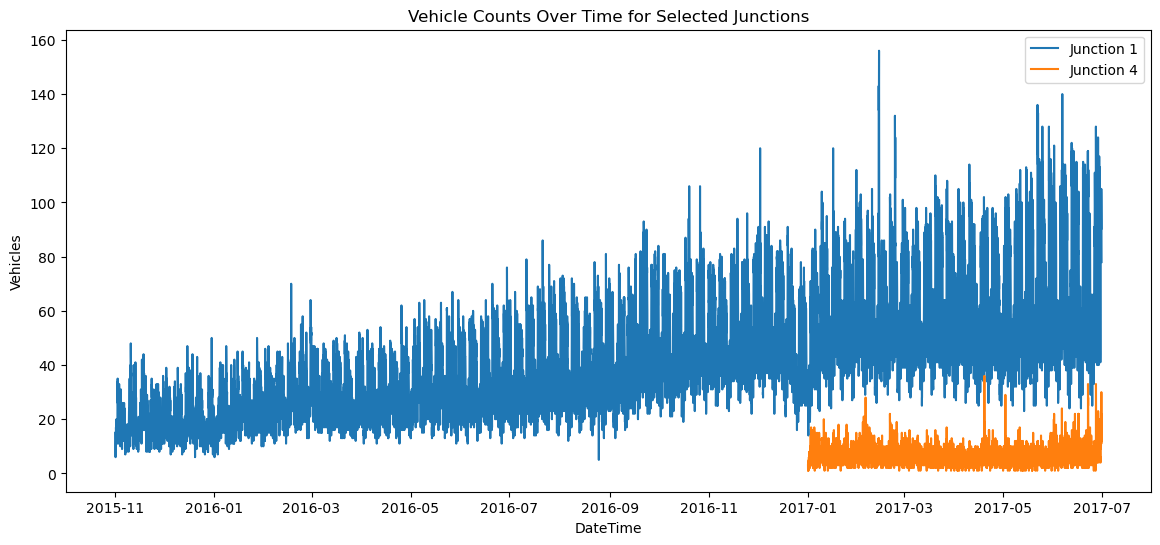

In [21]:
#traffic counts per junction (summary statistics)
print(df.groupby('Junction')['Vehicles'].describe())

#vehicle counts for each junction over time (sample plot for 2 junctions for clarity)
plt.figure(figsize=(14,6))
for junc in [1, 4]:  #Junction 1 and Junction 4 to compare full vs sparse data
    subset = df[df['Junction'] == junc]
    plt.plot(subset['DateTime'], subset['Vehicles'], label=f'Junction {junc}')
plt.title('Vehicle Counts Over Time for Selected Junctions')
plt.xlabel('DateTime')
plt.ylabel('Vehicles')
plt.legend()
plt.show()


In [8]:
# extracts time-based features
df['hour'] = df['DateTime'].dt.hour
df['day_of_week'] = df['DateTime'].dt.dayofweek  # Monday=0, Sunday=6
df['month'] = df['DateTime'].dt.month
df['is_weekend'] = df['day_of_week'].isin([5,6]).astype(int)  # 1 if weekend else 0

# Show sample rows with new features
print(df.head())


             DateTime  Junction  Vehicles           ID  hour  day_of_week  \
0 2015-11-01 00:00:00         1        15  20151101001     0            6   
1 2015-11-01 01:00:00         1        13  20151101011     1            6   
2 2015-11-01 02:00:00         1        10  20151101021     2            6   
3 2015-11-01 03:00:00         1         7  20151101031     3            6   
4 2015-11-01 04:00:00         1         9  20151101041     4            6   

   month  is_weekend  
0     11           1  
1     11           1  
2     11           1  
3     11           1  
4     11           1  


C:\Users\vivek\anaconda4\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vivek\anaconda4\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vivek\anaconda4\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\vivek\anaconda4\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length

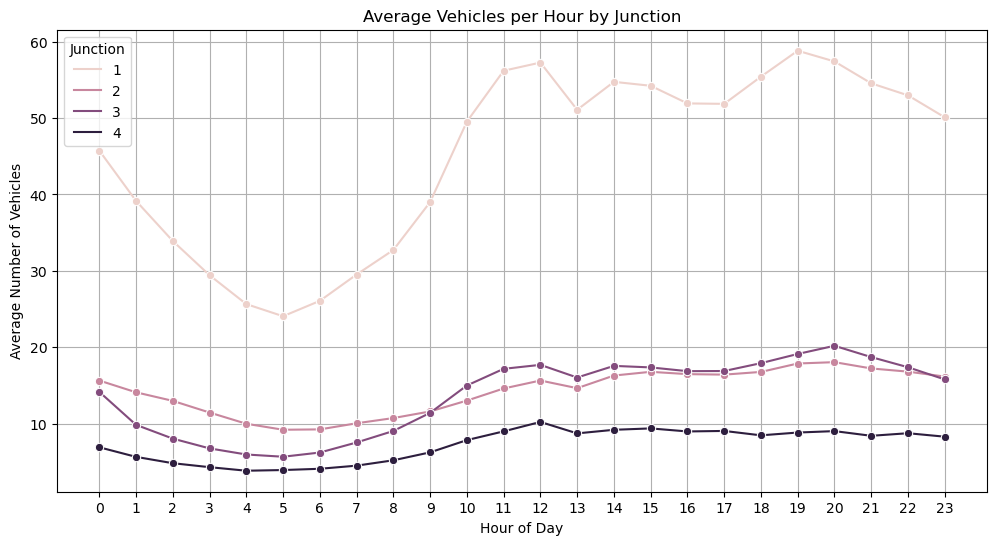

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

#Group data by junction and hour, then calculate average vehicles
avg_vehicles_hour = df.groupby(['Junction', 'hour'])['Vehicles'].mean().reset_index()

#each junction separately
sns.lineplot(data=avg_vehicles_hour, x='hour', y='Vehicles', hue='Junction', marker='o')

plt.title('Average Vehicles per Hour by Junction')
plt.xlabel('Hour of Day')
plt.ylabel('Average Number of Vehicles')
plt.xticks(range(0, 24))
plt.grid(True)
plt.legend(title='Junction')
plt.show()


C:\Users\vivek\anaconda4\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vivek\anaconda4\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vivek\anaconda4\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\vivek\anaconda4\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length

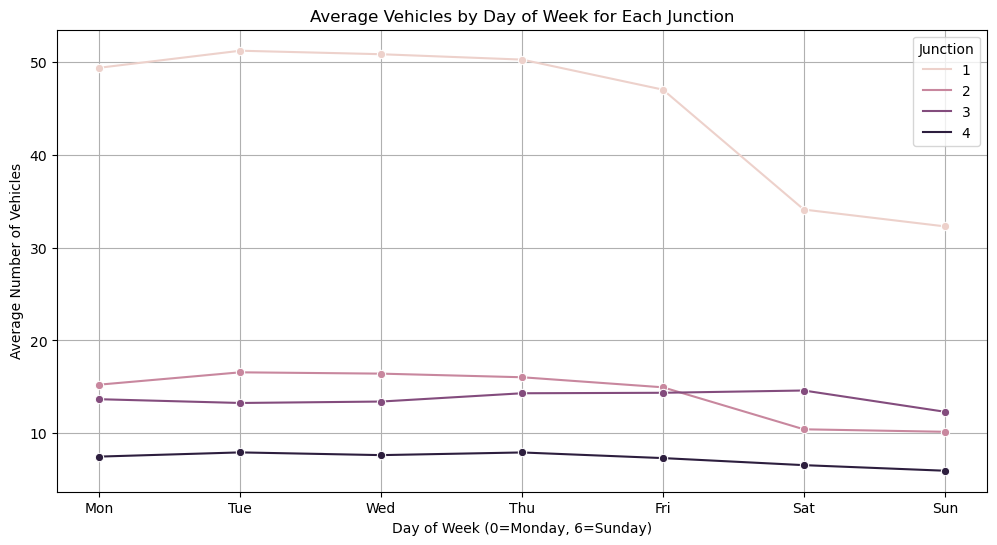

In [10]:
plt.figure(figsize=(12, 6))

# Group data by junction and day_of_week, then calculate average vehicles
avg_vehicles_day = df.groupby(['Junction', 'day_of_week'])['Vehicles'].mean().reset_index()

sns.lineplot(data=avg_vehicles_day, x='day_of_week', y='Vehicles', hue='Junction', marker='o')
plt.title('Average Vehicles by Day of Week for Each Junction')
plt.xlabel('Day of Week (0=Monday, 6=Sunday)')
plt.ylabel('Average Number of Vehicles')
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.grid(True)
plt.legend(title='Junction')
plt.show()


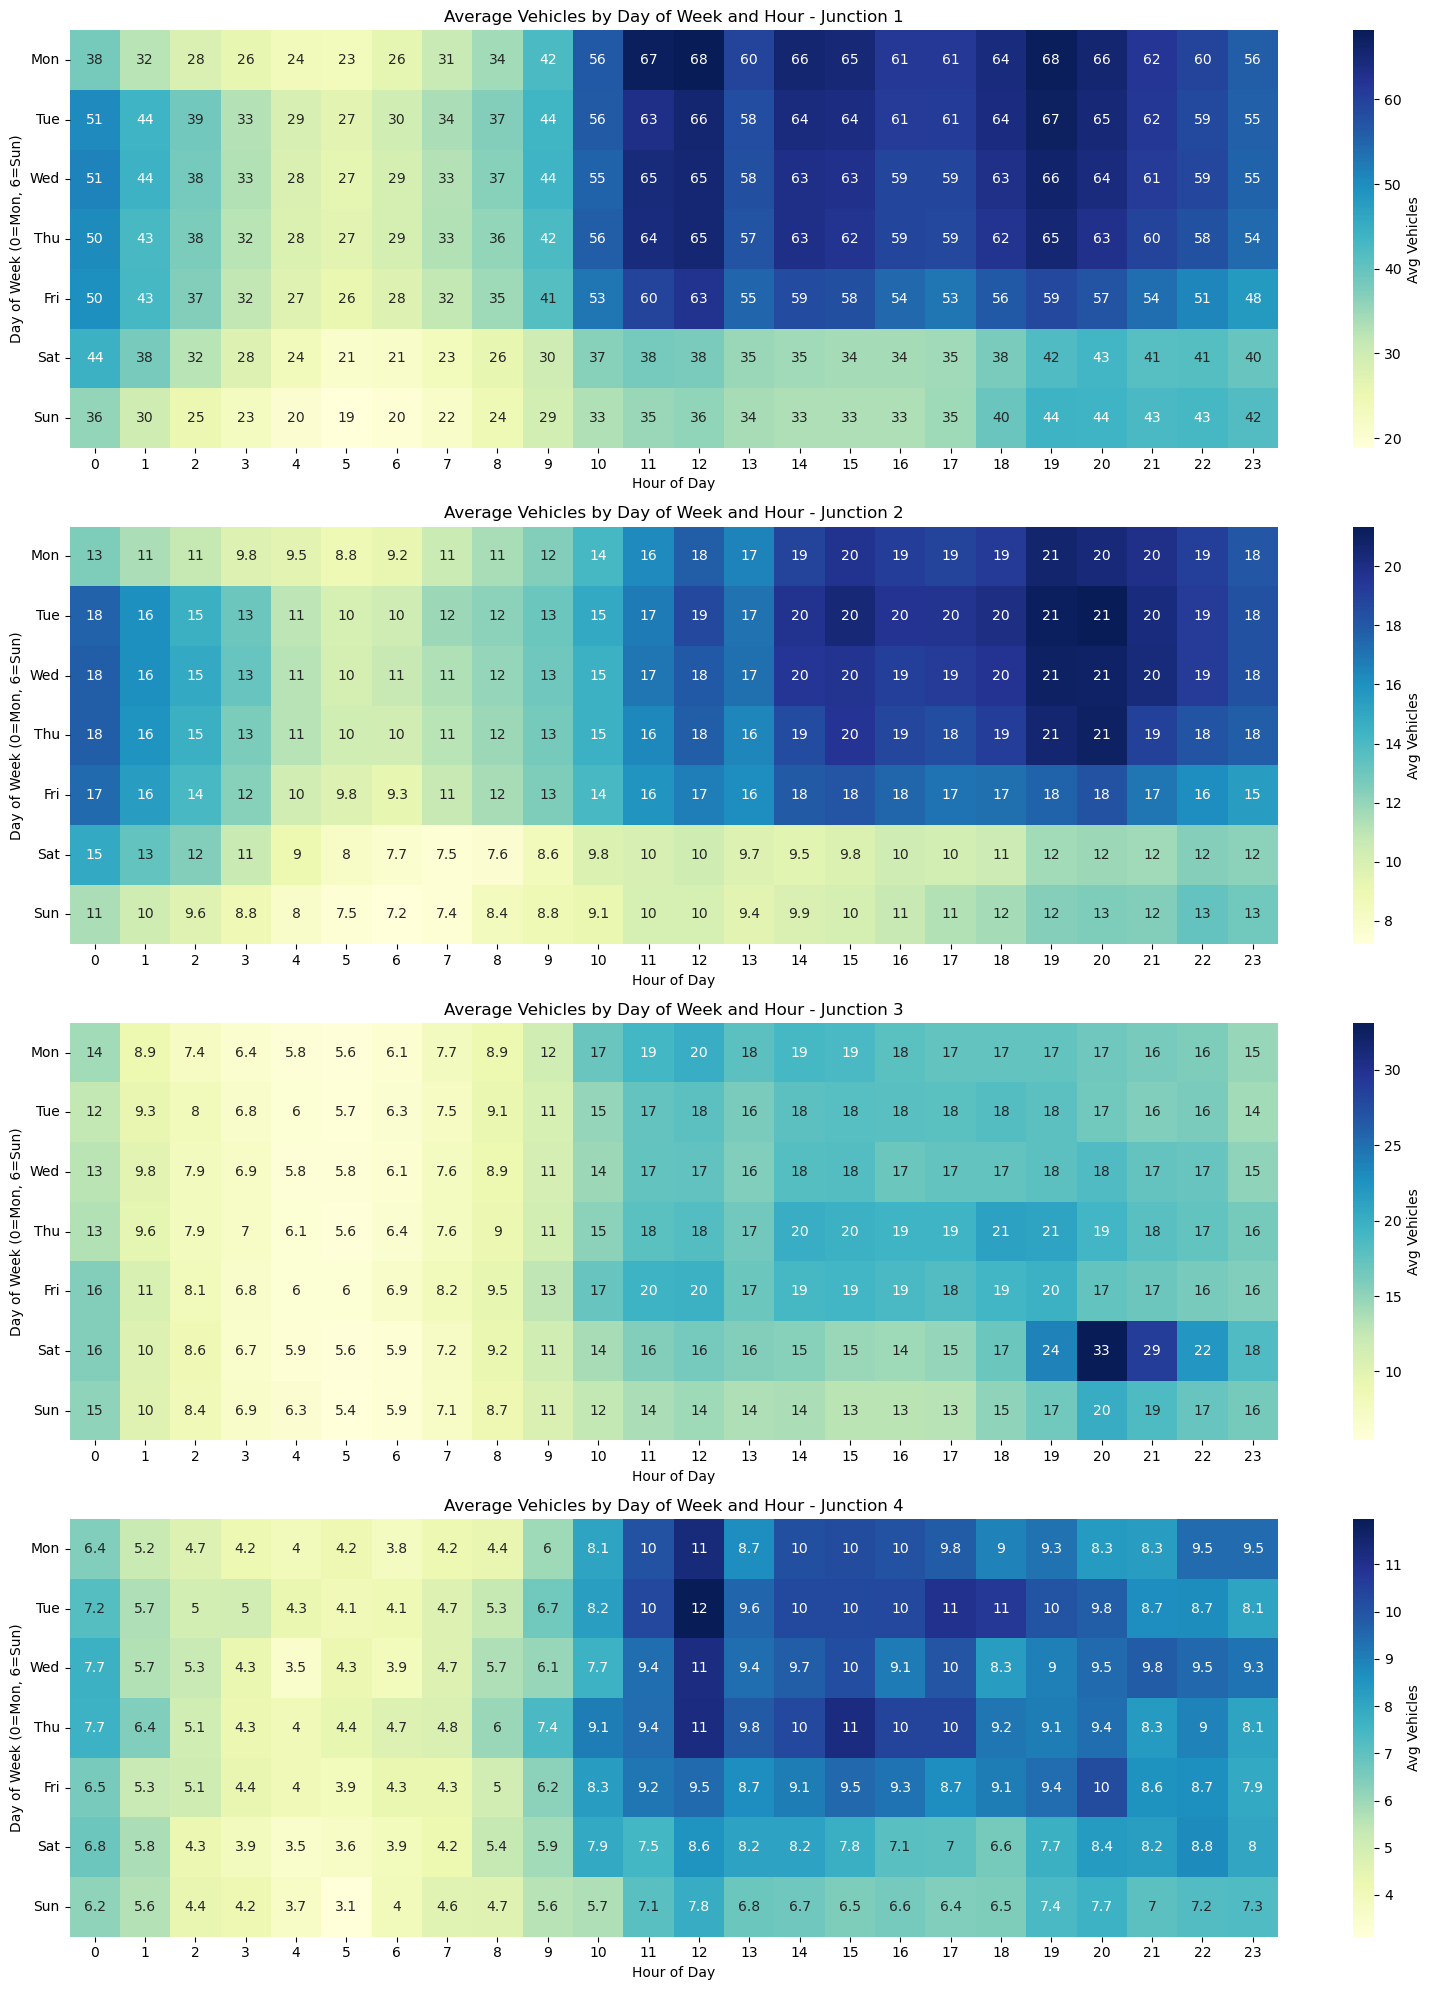

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 20))

for i, junction_num in enumerate(sorted(df['Junction'].unique()), 1):
    plt.subplot(4, 1, i)
    
    # Filter data for the junction
    data_j = df[df['Junction'] == junction_num]
    
    # Pivot table: day_of_week x hour with mean vehicles
    pivot_table = data_j.pivot_table(index='day_of_week', columns='hour', values='Vehicles', aggfunc='mean')

    sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, cbar=True,
                cbar_kws={'label': 'Avg Vehicles'})
    
    plt.title(f'Average Vehicles by Day of Week and Hour - Junction {junction_num}')
    plt.xlabel('Hour of Day')
    plt.ylabel('Day of Week (0=Mon, 6=Sun)')
    plt.yticks(ticks=np.arange(7) + 0.5, labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=0)

plt.tight_layout()
plt.show()


C:\Users\vivek\anaconda4\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vivek\anaconda4\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vivek\anaconda4\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\vivek\anaconda4\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length

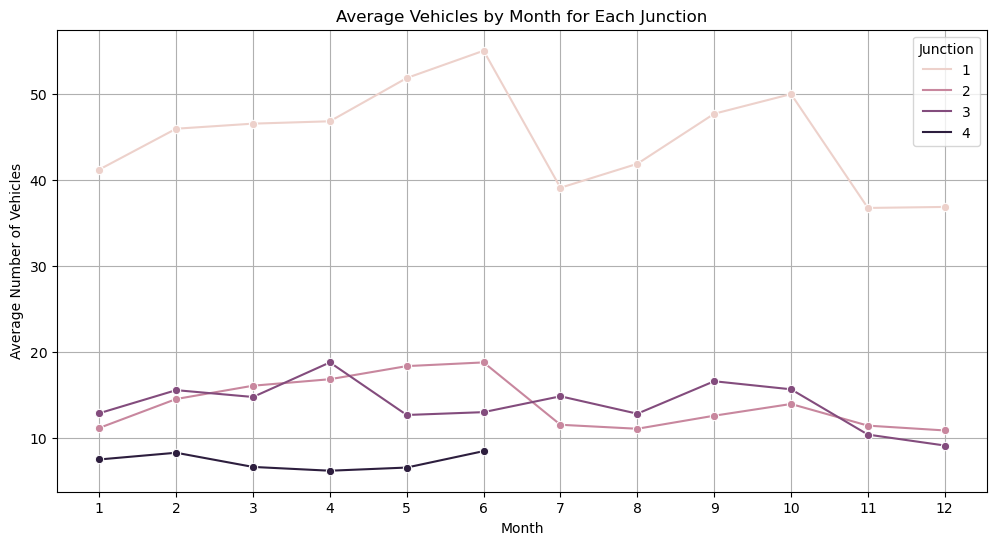

In [15]:
plt.figure(figsize=(12, 6))

# Group by junction and month, calculate mean vehicles
avg_vehicles_month = df.groupby(['Junction', 'month'])['Vehicles'].mean().reset_index()

sns.lineplot(data=avg_vehicles_month, x='month', y='Vehicles', hue='Junction', marker='o')
plt.title('Average Vehicles by Month for Each Junction')
plt.xlabel('Month')
plt.ylabel('Average Number of Vehicles')
plt.xticks(range(1, 13))
plt.grid(True)
plt.legend(title='Junction')
plt.show()


C:\Users\vivek\anaconda4\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vivek\anaconda4\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vivek\anaconda4\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vivek\anaconda4\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

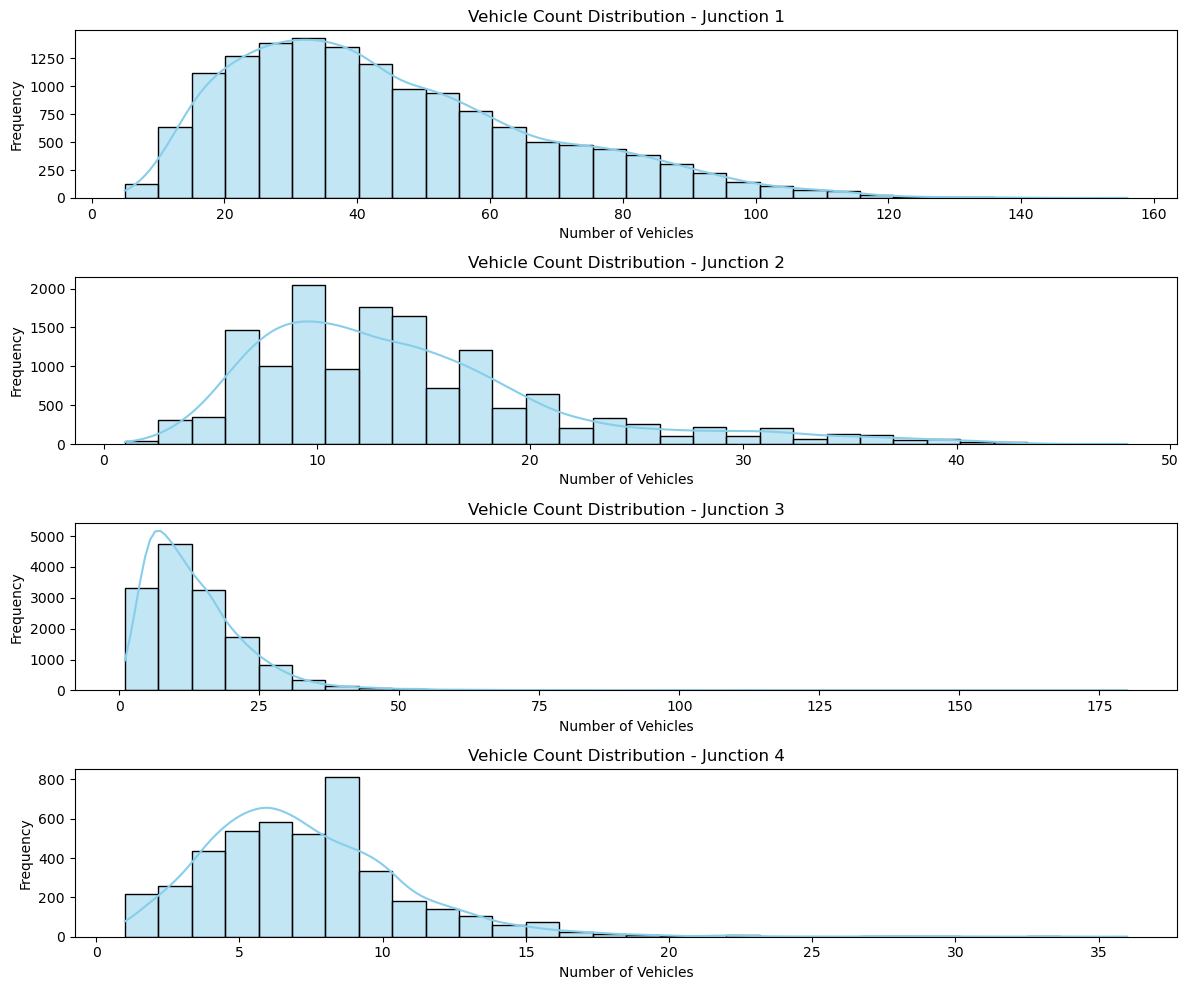

In [17]:
plt.figure(figsize=(12, 10))

junctions = sorted(df['Junction'].unique())

for i, junction_num in enumerate(junctions, 1):
    plt.subplot(len(junctions), 1, i)
    sns.histplot(df[df['Junction'] == junction_num]['Vehicles'], bins=30, kde=True, color='skyblue')
    plt.title(f'Vehicle Count Distribution - Junction {junction_num}')
    plt.xlabel('Number of Vehicles')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()